<a href="https://colab.research.google.com/github/Anidafio/4105_hw7/blob/main/hw7_p1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms

cifar10 = datasets.CIFAR10(
    root='./data', train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5))
    ]))

cifar10_val = datasets.CIFAR10(
    root='./data', train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5))
    ]))

cifar10

100%|██████████| 170498071/170498071 [00:02<00:00, 71401701.37it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=512,
                                           shuffle=True)

In [20]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:

            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            loss_train += loss.item()


        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(8, 4, kernel_size=3, padding=1)
        self.act3 = nn.Tanh()
        self.pool3 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(4 * 4 * 4, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):

        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = self.pool3(self.act3(self.conv3(out)))

        out = out.view(-1, 4 * 4 * 4)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

model = Net()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 300,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

Epoch: 1, Loss: 1.786326
Epoch: 2, Loss: 1.629251
Epoch: 3, Loss: 1.612280
Epoch: 4, Loss: 1.460764
Epoch: 5, Loss: 1.462924
Epoch: 6, Loss: 1.400270
Epoch: 7, Loss: 1.464248
Epoch: 8, Loss: 1.184591
Epoch: 9, Loss: 1.303495
Epoch: 10, Loss: 1.349758
Epoch: 11, Loss: 1.213134
Epoch: 12, Loss: 1.273646
Epoch: 13, Loss: 1.211938
Epoch: 14, Loss: 1.200324
Epoch: 15, Loss: 1.207730
Epoch: 16, Loss: 1.176204
Epoch: 17, Loss: 1.194324
Epoch: 18, Loss: 1.123314
Epoch: 19, Loss: 1.130277
Epoch: 20, Loss: 1.095313
Epoch: 21, Loss: 1.266871
Epoch: 22, Loss: 1.198553
Epoch: 23, Loss: 1.147457
Epoch: 24, Loss: 1.124271
Epoch: 25, Loss: 1.103563
Epoch: 26, Loss: 1.007023
Epoch: 27, Loss: 1.161789
Epoch: 28, Loss: 1.112873
Epoch: 29, Loss: 1.154968
Epoch: 30, Loss: 1.027680
Epoch: 31, Loss: 1.092512
Epoch: 32, Loss: 1.130850
Epoch: 33, Loss: 1.081440
Epoch: 34, Loss: 1.051267
Epoch: 35, Loss: 1.103338
Epoch: 36, Loss: 0.981857
Epoch: 37, Loss: 1.091079
Epoch: 38, Loss: 1.104357
Epoch: 39, Loss: 1.10

In [24]:
import collections

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)
all_acc_dict = collections.OrderedDict()

predicted_labels = []
true_labels = []

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
                predicted_labels.extend(predicted.numpy())
                true_labels.extend(labels.numpy())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict

all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.69
Accuracy val: 0.65


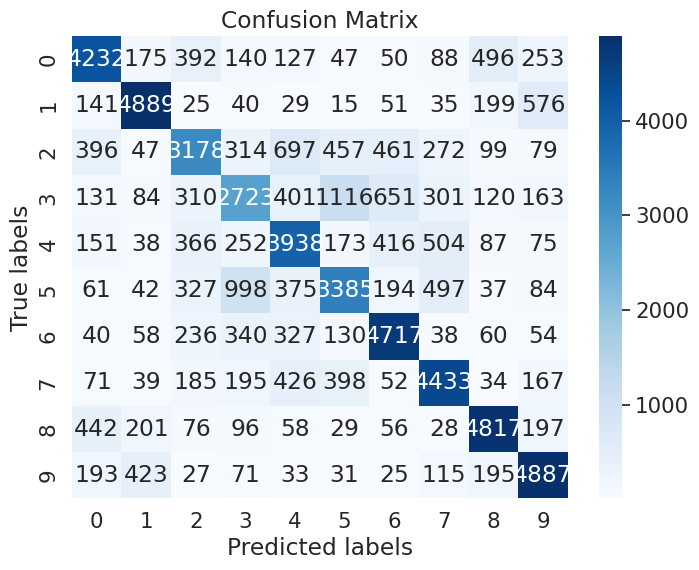

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      6000
           1       0.82      0.81      0.82      6000
           2       0.62      0.53      0.57      6000
           3       0.53      0.45      0.49      6000
           4       0.61      0.66      0.63      6000
           5       0.59      0.56      0.57      6000
           6       0.71      0.79      0.74      6000
           7       0.70      0.74      0.72      6000
           8       0.78      0.80      0.79      6000
           9       0.75      0.81      0.78      6000

    accuracy                           0.69     60000
   macro avg       0.68      0.69      0.68     60000
weighted avg       0.68      0.69      0.68     60000



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)  # Adjust the font scale for better visualization

    # Create a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(true_labels), yticklabels=np.unique(predicted_labels))

    # Set labels, title, and display the plot
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix)

# Classification report
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", class_report)